<a href="https://colab.research.google.com/github/OscarDiez/hpc_course/blob/main/chapters_examples/1_M1_S1_Evolution_and_Fundamentals_of_HPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. M1.S1.Evolution and Fundamentals of HPC




## Anatomy of Supercomputers

### Overview

Supercomputers are designed to perform complex computations at extremely high speeds, often measured in petaflops (quadrillions of calculations per second). These systems are composed of various layers, each contributing to the overall performance and capabilities of the supercomputer. Understanding the anatomy of supercomputers provides insight into how these systems are structured and optimized for High-Performance Computing (HPC).

### Layers of a Supercomputer

The anatomy of a supercomputer can be broken down into several layers, each with specific components that serve a distinct purpose. These layers include the application layer, programming environment, tools, cluster software, system software, and hardware.

| **Layer**              | **Component**                    | **Description**                                               | **Examples**                                                                 |
|------------------------|----------------------------------|---------------------------------------------------------------|-------------------------------------------------------------------------------|
| **Application Layer**  | Application                      | Specific domains using HPC                                     | Climate & Meteorology, Drug design, Quantum Chromodynamics (QCD), Astrophysics, Protein Dynamics |
| **Programming Environment** | Language                  | Programming languages used in HPC                              | C/C++, Fortran, Python, CUDA                                                  |
|                        | Parallel Programming             | Frameworks for writing parallel programs                       | MPI, OpenMP, OpenACC, CUDA, Domain-Specific Languages (DSL)                  |
|                        | Libraries                        | Supportive software libraries                                  | Mathematical libraries, I/O libraries, checkpointing libraries               |
| **Tools**              | Compilers                        | Translate code to machine language                             | Intel Compiler (icc), GCC, LLVM                                               |
|                        | Debuggers                        | Tools to find bugs in software                                 | TotalView, Allinea DDT, PGI, GNU GDB                                          |
|                        | Performance Analysis Tools       | Tools to analyze and optimize performance                      | Score-P, Scalasca, Vampir, VTune, Extrae/Paraver                              |
| **Cluster Software**   | Resource Management/Job Scheduling | Managing resources and job queueing                           | SLURM, Torque/Maui, IBM LSF, PBS Pro                                          |
|                        | File System                      | Systems to manage data storage                                 | Lustre, NFS, GPFS, BeeGFS                                                     |
|                        | Cluster Management               | Tools for managing cluster operations                          | ParaStation, Various Monitoring Tools, Software Installation Tools, Container Technologies (e.g., Docker) |
| **System Software**    | Operating System                 | The OS on which the HPC systems run                            | Linux OS (Red Hat, CentOS, etc.)                                              |
| **Hardware**           | Hardware                         | Physical components of HPC systems                             | Servers, Storage Solutions, Switches, Infrastructure Components               |

**Table 1: Anatomy of a HPC System. Different layers from hardware to applications.**

In the next chapter, we will delve deeper into each of these components to understand their roles and how they contribute to the overall performance of a supercomputer.


# Introduction to Parallelization

## Overview

Parallelization is the process of dividing a computational task into smaller subtasks that can be executed simultaneously on multiple processors. The goal of parallelization is to reduce the overall computation time by utilizing the combined processing power of multiple CPU cores.

### Why Parallelization?

As computational tasks become more complex and data sizes increase, the time required to perform these tasks can grow significantly. By dividing the workload across multiple processors, we can achieve faster computation times. However, parallelization is not without its challenges, especially when considering overheads, synchronization, and the architecture of the computing environment.

### Example: Sum of Squares

Let's consider a simple example where we compute the sum of squares for large numbers. We'll start by implementing this in both serial (one processor) and parallel (multiple processors) forms to observe the difference in performance.


In [1]:
import time
from concurrent.futures import ProcessPoolExecutor

# A function to compute the sum of squares for a given range
def sum_of_squares(n):
    return sum(i * i for i in range(n))

# Parameters for testing
numbers = [10**7, 10**7, 10**7, 10**7]

# Serial Execution
start_time = time.time()
results_serial = [sum_of_squares(n) for n in numbers]
end_time = time.time()
serial_time = end_time - start_time

print(f"Serial Execution Time: {serial_time:.4f} seconds")

# Parallel Execution using ProcessPoolExecutor
start_time = time.time()
with ProcessPoolExecutor() as executor:
    results_parallel = list(executor.map(sum_of_squares, numbers))
end_time = time.time()
parallel_time = end_time - start_time

print(f"Parallel Execution Time: {parallel_time:.4f} seconds")

# Comparison
print(f"Parallel execution was {serial_time/parallel_time:.2f} times faster than serial execution.")


Serial Execution Time: 18.2213 seconds
Parallel Execution Time: 8.9793 seconds
Parallel execution was 2.03 times faster than serial execution.


## Understanding the Results and Overheads

### Observing the Execution Times

In the example above, we compute the sum of squares for four large numbers. The computation is first done sequentially (serial execution), and then in parallel using Python's `ProcessPoolExecutor`.

- **Serial Execution**: The task is executed on a single processor, where each number in the list is processed one after the other.
- **Parallel Execution**: The task is divided into smaller tasks, each processed on a separate CPU core simultaneously.

### Overheads in Parallel Execution

While parallelization aims to reduce computation time, it introduces certain overheads:

1. **Task Splitting**: The workload needs to be divided into smaller tasks, which can introduce delays.
2. **Process Management**: In parallel execution, especially with `ProcessPoolExecutor`, there is overhead associated with creating and managing multiple processes.
3. **Inter-Process Communication**: If tasks need to communicate or share data, this can introduce additional delays.
4. **Resource Contention**: On shared environments like Google Colab, multiple users or processes may compete for the same resources, leading to variable performance.

These overheads can sometimes negate the benefits of parallelization, especially for tasks that aren't large enough to justify the overhead.

### Google Colab and Virtual Machines

Google Colab operates in a virtualized environment, where resources like CPUs and memory are shared among many users. This can result in varying performance due to:

- **Dynamic Resource Allocation**: CPU cores and memory are allocated dynamically based on availability, which can lead to fluctuations in performance.
- **VM Overheads**: Virtual Machines (VMs) add an additional layer of abstraction over the physical hardware, introducing some latency.

Despite these challenges, parallelization is still a powerful tool when used appropriately.


## Moore's Law and Its Implications

### What is Moore's Law?

Moore's Law, observed by Gordon Moore in 1965, states that the number of transistors on a microchip doubles approximately every two years, while the cost per transistor decreases. This exponential growth has led to the rapid increase in computational power over the past several decades.

### Implications for Parallelization

As processors have become more powerful and contain more cores, parallelization has become increasingly relevant. However, Moore's Law also highlights a key challenge: while the number of cores may increase, the benefits of adding more cores diminish due to factors like:

- **Memory Bottlenecks**: Even with more cores, if the memory bandwidth doesn't scale proportionately, the system may become bottlenecked by memory access times.
- **Synchronization Overhead**: With more cores, the need to synchronize tasks across processors can introduce significant overhead.

### Example: Increasing Number of Cores

If we increase the number of cores in a system without increasing the memory bandwidth or optimizing for synchronization, we may observe diminishing returns. Let's consider this through an example.


In [2]:
# Adjusting the number of chunks (cores) for parallel execution
for num_chunks in [1, 2, 4, 8, 16]:
    start_time = time.time()
    with ProcessPoolExecutor(max_workers=num_chunks) as executor:
        results_parallel = list(executor.map(sum_of_squares, numbers))
    end_time = time.time()
    parallel_time = end_time - start_time
    print(f"Parallel Execution Time with {num_chunks} chunks: {parallel_time:.4f} seconds")


Parallel Execution Time with 1 chunks: 4.8810 seconds
Parallel Execution Time with 2 chunks: 8.7592 seconds
Parallel Execution Time with 4 chunks: 8.7586 seconds
Parallel Execution Time with 8 chunks: 9.3728 seconds
Parallel Execution Time with 16 chunks: 6.2746 seconds


## Amdahl's Law and the Limits of Parallelization

### What is Amdahl's Law?

Amdahl's Law, formulated by Gene Amdahl in 1967, provides a theoretical limit to the speedup achievable by parallelizing a computational task. It states that the overall speedup of a program is limited by the portion of the program that cannot be parallelized.

### Formula

The speedup `S` achievable with `P` processors is given by:

\[ S(P) = \frac{1}{(1 - f) + \frac{f}{P}} \]

Where:
- `f` is the fraction of the program that can be parallelized.
- `1 - f` is the portion of the program that must be executed serially.

### Implications of Amdahl's Law

- **Diminishing Returns**: As the number of processors increases, the speedup begins to level off, especially if a significant portion of the task cannot be parallelized.
- **Optimization Focus**: To maximize speedup, efforts should focus on parallelizing as much of the program as possible (`f` should be as large as possible).

### Example: Varying Parallelizable Portions

Let's simulate the effect of varying the parallelizable portion of a task. We'll assume that a certain fraction of the `sum_of_squares` computation can be parallelized.


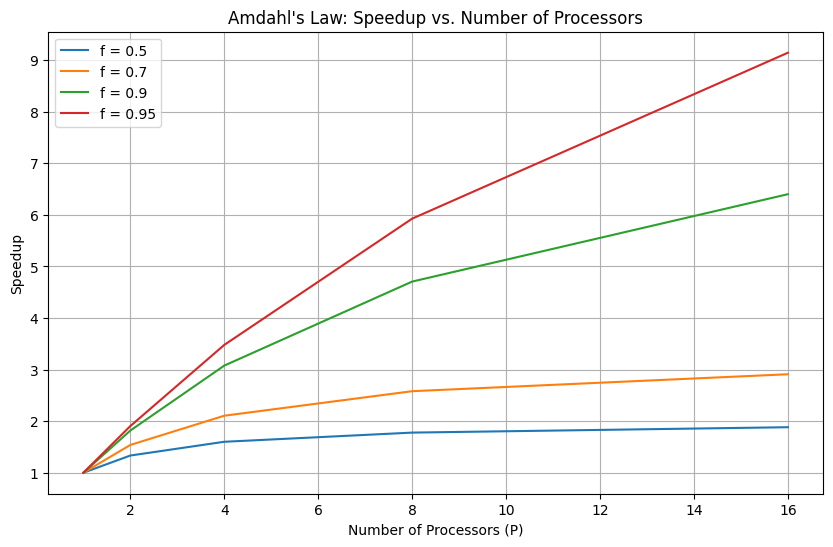

In [ ]:
def simulate_amdahls_law(f, P):
    return 1 / ((1 - f) + f / P)

# Plotting the speedup for different values of P and f
import matplotlib.pyplot as plt

P_values = [1, 2, 4, 8, 16]
f_values = [0.5, 0.7, 0.9, 0.95]

plt.figure(figsize=(10, 6))

for f in f_values:
    speedups = [simulate_amdahls_law(f, P) for P in P_values]
    plt.plot(P_values, speedups, label=f'f = {f}')

plt.xlabel('Number of Processors (P)')
plt.ylabel('Speedup')
plt.title('Amdahl\'s Law: Speedup vs. Number of Processors')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion and Practical Takeaways

### Key Points

1. **Parallelization**: It is a powerful tool for speeding up computational tasks, but it comes with overheads, especially in virtualized environments like Google Colab.
2. **Moore's Law**: The continued growth in computational power has enabled more widespread use of parallelism, but physical limits are becoming more apparent.
3. **Amdahl's Law**: Highlights the limitations of parallelization, emphasizing the need to focus on optimizing the parallelizable portion of a program.

### Practical Considerations

- **Task Size**: Parallelization is most beneficial for large, computationally intensive tasks where the overhead of managing parallel processes is outweighed by the speedup achieved.
- **Environment**: In virtualized environments like Google Colab, performance can vary due to dynamic resource allocation and other factors. Understanding these limitations is key to effectively utilizing parallel computing.

### Further Reading

- **Moore's Law**: Explore how the growth of computational power has slowed and the implications for future technologies.
- **Amdahl's Law**: Study how Amdahl's Law applies to different types of parallel computing architectures.

Understanding these concepts will help you better leverage parallel computing in your own work, whether in research, development, or data science.


# Exercise: The Importance of Memory Hierarchy in High-Performance Computing (HPC)

## Overview

In High-Performance Computing (HPC), the memory hierarchy plays a critical role in determining the overall performance of an application. The memory hierarchy includes different levels of storage, such as registers, cache, main memory (RAM), and secondary storage. Each level has different characteristics in terms of speed, size, and proximity to the CPU.

### Objective

In this exercise, you will observe how the performance of a simple computational task (matrix multiplication) is affected by the use of different levels of the memory hierarchy. Specifically, you'll measure the time taken to access data stored in L1 cache, L2 cache, and main memory.

### Why Memory Hierarchy Matters

- **Cache Levels (L1, L2, L3)**: Cache memory is much faster than main memory, but it is also smaller. L1 cache is the closest to the CPU and is the fastest, followed by L2 and L3 caches.
- **Main Memory (RAM)**: Larger but slower than the cache. Data that does not fit into the cache must be fetched from main memory, leading to slower access times.
- **Memory Bottleneck**: In many HPC applications, the CPU spends a significant amount of time waiting for data to be fetched from memory. Optimizing data access patterns to take advantage of the cache can lead to significant performance improvements.

### Exercise Structure

You will perform matrix multiplication on matrices of different sizes, where the data either fits within the L1 cache, L2 cache, or exceeds the cache size, requiring access to main memory. By comparing the execution times, you will observe the impact of the memory hierarchy on performance.


In [3]:
import numpy as np
import time

def matrix_multiplication(size):
    # Generate two random matrices
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    # Perform matrix multiplication
    start_time = time.time()
    C = np.dot(A, B)
    end_time = time.time()

    return end_time - start_time

# Parameters for testing different matrix sizes
sizes = [128, 512, 1024, 2048]  # These sizes are illustrative; adjust based on your CPU cache sizes

# Measure time for matrix multiplication at different sizes
times = []
for size in sizes:
    elapsed_time = matrix_multiplication(size)
    times.append(elapsed_time)
    print(f"Matrix size: {size}x{size}, Time taken: {elapsed_time:.4f} seconds")

# Discussion on Results
print("\n## Discussion on Results")
print("Observe how the time increases as the matrix size exceeds the cache size. The smaller matrices likely fit in the L1 or L2 cache,")
print("resulting in faster access times and quicker computations. As the matrix size grows beyond the cache capacity, the CPU needs to access")
print("main memory more frequently, leading to longer computation times.")


Matrix size: 128x128, Time taken: 0.0084 seconds
Matrix size: 512x512, Time taken: 0.0345 seconds
Matrix size: 1024x1024, Time taken: 0.1977 seconds
Matrix size: 2048x2048, Time taken: 0.9768 seconds

## Discussion on Results
Observe how the time increases as the matrix size exceeds the cache size. The smaller matrices likely fit in the L1 or L2 cache,
resulting in faster access times and quicker computations. As the matrix size grows beyond the cache capacity, the CPU needs to access
main memory more frequently, leading to longer computation times.


## Discussion and Analysis

### Expected Results

- **Small Matrices (128x128)**: These matrices are likely to fit entirely within the L1 or L2 cache. As a result, the computation time should be relatively low, as the data can be accessed quickly by the CPU.
- **Medium-Sized Matrices (512x512, 1024x1024)**: These matrices may still fit within the L2 cache but might exceed the L1 cache size. You should observe a slight increase in computation time as more cache levels are involved.
- **Large Matrices (2048x2048)**: These matrices will exceed the cache size and require frequent access to the main memory. This should result in a noticeable increase in computation time due to the slower memory access.

### The Importance of Memory Hierarchy in HPC

The results of this exercise highlight the importance of understanding and optimizing memory usage in HPC applications. Accessing data from cache is significantly faster than accessing data from main memory. In large-scale computations, such as those performed in HPC environments, efficiently utilizing the cache can lead to substantial performance improvements.

### Practical Takeaways

- **Data Locality**: Structure your computations to maximize data locality, ensuring that the most frequently accessed data stays in the cache as much as possible.
- **Blocking/Chunking**: Techniques like blocking (or tiling) break down larger computations into smaller chunks that fit within the cache, reducing the need to access slower memory levels.
- **Algorithm Optimization**: Optimize algorithms to make better use of the memory hierarchy, particularly in applications where data access patterns are critical to performance.

By understanding and applying these concepts, you can significantly improve the performance of your HPC applications, particularly in memory-intensive tasks.


# HPC Application examples

## Example 1: Computational Fluid Dynamics (CFD)

## Overview

Computational Fluid Dynamics (CFD) is a branch of fluid mechanics that uses numerical analysis and data structures to solve and analyze problems that involve fluid flows. CFD is widely used in various industries, including aerospace, automotive, and energy, to simulate the behavior of fluids and gases in complex environments.

### Applications of CFD

CFD simulations are crucial for understanding and predicting the behavior of fluids in situations where physical testing would be too expensive, dangerous, or impractical. Examples include:

- **Aerospace Engineering**: Simulating airflow over an aircraft to optimize aerodynamic performance and reduce drag.
- **Automotive Industry**: Analyzing airflow around vehicles to improve fuel efficiency and cooling systems.
- **Energy Sector**: Modeling fluid flows in pipelines, turbines, and reactors to enhance efficiency and safety.
- **Biomedical Engineering**: Simulating blood flow in arteries to study cardiovascular diseases and design medical devices.

### How CFD Works

CFD involves solving the Navier-Stokes equations, which describe the motion of fluid substances. These equations are highly complex and nonlinear, requiring sophisticated numerical methods and significant computational resources to solve.

1. **Preprocessing**: The geometry of the object being studied is defined, and the fluid domain is discretized into a mesh of small elements.
2. **Solver**: The CFD solver numerically solves the governing equations on the mesh, often using iterative methods. This step is highly computationally intensive and benefits greatly from parallel processing.
3. **Postprocessing**: The results are analyzed and visualized to interpret the fluid flow characteristics, such as velocity, pressure, and temperature distributions.

### Example: Simulating Airflow Over an Airfoil

Let's consider an example where we simulate airflow over an airfoil using a simple 2D CFD model. This example will illustrate how CFD is used to analyze aerodynamic performance.



<ipython-input-5-9c9911559678>:26: RuntimeWarning: invalid value encountered in divide
  v = -gamma / (2 * np.pi) * (Y / (X**2 + Y**2))
<ipython-input-5-9c9911559678>:29: RuntimeWarning: divide by zero encountered in log
  psi = U_inf * Y - gamma / (2 * np.pi) * np.log(np.sqrt(X**2 + Y**2))


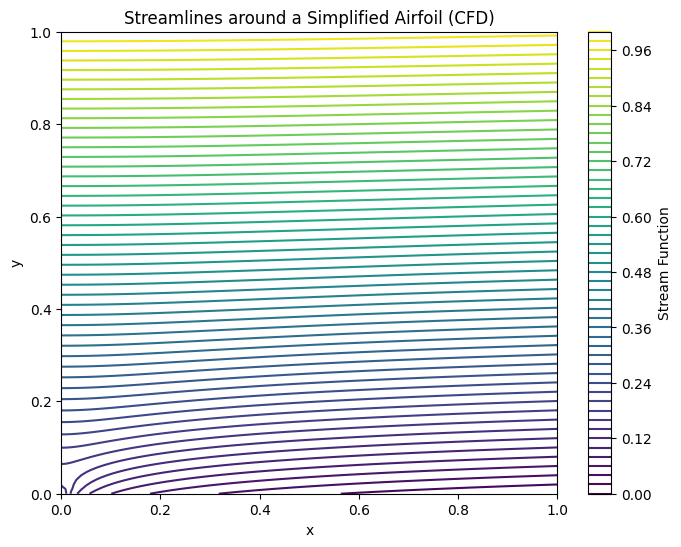

In [5]:
# Note: This is a highly simplified example and not a full-fledged CFD simulation.
# Full CFD simulations typically require specialized software like ANSYS Fluent, OpenFOAM, or SU2.

import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
nx, ny = 100, 100  # Grid size
Lx, Ly = 1.0, 1.0  # Domain size

# Airfoil parameters
c = 0.4  # Chord length
alpha = np.radians(5)  # Angle of attack

# Grid generation
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Simplified potential flow model around an airfoil
U_inf = 1.0  # Free stream velocity
gamma = 2.0 * np.pi * c * U_inf * np.sin(alpha)  # Circulation (simplified)

# Velocity field (simplified)
u = U_inf * (1 - (Y / Ly))
v = -gamma / (2 * np.pi) * (Y / (X**2 + Y**2))

# Stream function (simplified)
psi = U_inf * Y - gamma / (2 * np.pi) * np.log(np.sqrt(X**2 + Y**2))

# Plotting the streamlines to visualize the flow
plt.figure(figsize=(8, 6))
plt.contour(X, Y, psi, levels=50, cmap='viridis')
plt.title('Streamlines around a Simplified Airfoil (CFD)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Stream Function')
plt.show()


## Discussion

### Importance of HPC in CFD

CFD simulations are computationally intensive due to the need to solve large systems of partial differential equations over fine meshes. High-Performance Computing (HPC) is essential in CFD to handle the massive amounts of data and calculations required, enabling simulations that are both accurate and timely.

### Key Challenges

- **Mesh Size**: Larger and finer meshes provide more accurate results but require more memory and processing power.
- **Nonlinearity**: The nonlinear nature of the Navier-Stokes equations makes CFD simulations complex and time-consuming.
- **Parallelism**: Effective parallelization is crucial in CFD to distribute the workload across multiple processors and reduce simulation times.

CFD remains a cornerstone of engineering and scientific research, enabling the design and optimization of everything from aircraft to medical devices.


# Example 2: Climate Modeling

## Overview

Climate modeling involves the use of mathematical models to simulate the Earth's climate system, including the atmosphere, oceans, land surface, and ice. These models are essential tools for understanding past climate variations, predicting future climate change, and informing policy decisions.

### Applications of Climate Modeling

Climate models are used for a wide range of applications, including:

- **Weather Prediction**: Short-term forecasts of weather patterns and extreme events.
- **Climate Change Projections**: Long-term predictions of climate change due to human activities, such as greenhouse gas emissions.
- **Impact Assessment**: Analyzing the potential impacts of climate change on ecosystems, agriculture, water resources, and human health.
- **Policy Development**: Informing climate policies and international agreements, such as the Paris Agreement.

### How Climate Models Work

Climate models are based on the fundamental laws of physics, including the conservation of mass, momentum, and energy. These models divide the Earth's atmosphere, oceans, and land into a three-dimensional grid and solve the governing equations for each grid cell over time.

1. **Atmospheric Model**: Simulates the dynamics of the atmosphere, including temperature, humidity, wind patterns, and precipitation.
2. **Ocean Model**: Simulates the circulation of the oceans, including heat transport and interactions with the atmosphere.
3. **Land Surface Model**: Simulates the exchange of energy, water, and carbon between the land surface and the atmosphere.
4. **Sea Ice Model**: Simulates the formation, melting, and movement of sea ice.

### Example: Simple Climate Model (Energy Balance Model)

Let's consider a simple energy balance model (EBM) to simulate the Earth's temperature. This model balances the incoming solar radiation with the outgoing infrared radiation to estimate the global mean temperature.



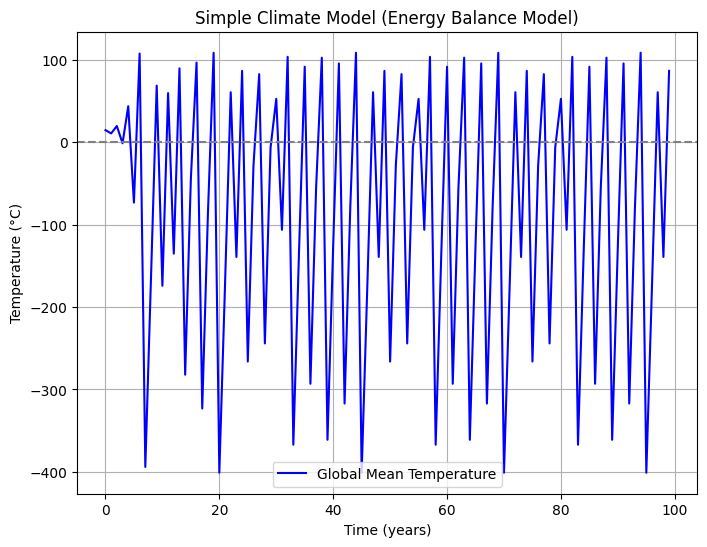

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
S0 = 1361  # Solar constant (W/m^2)
alpha = 0.3  # Earth's albedo
epsilon = 0.62  # Emissivity of Earth
sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m^2K^4)

# Time parameters
years = 100
dt = 1  # Time step in years
time = np.arange(0, years, dt)

# Initial temperature (global mean temperature)
T = np.zeros_like(time)
T[0] = 288  # Initial temperature in Kelvin

# Energy balance model
for t in range(1, len(time)):
    incoming = S0 * (1 - alpha) / 4
    outgoing = epsilon * sigma * T[t-1]**4
    T[t] = T[t-1] + dt * (incoming - outgoing)

# Convert temperature to Celsius
T_celsius = T - 273.15

# Plotting the global mean temperature over time
plt.figure(figsize=(8, 6))
plt.plot(time, T_celsius, color='blue', label='Global Mean Temperature')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Simple Climate Model (Energy Balance Model)')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


## Discussion

### Importance of HPC in Climate Modeling

Climate models are some of the most computationally demanding applications in HPC. Simulating the Earth's climate requires solving complex equations over large, multi-dimensional grids, often for thousands of years of simulated time. HPC systems allow climate scientists to:

- **Increase Resolution**: Higher-resolution models provide more detailed and accurate simulations, but require significantly more computational power.
- **Run Ensemble Simulations**: Running multiple simulations with slightly different initial conditions or parameters to assess uncertainty in climate projections.
- **Integrate Complex Interactions**: Incorporate various components of the Earth system, such as ocean circulation, cloud dynamics, and ice sheet behavior.

### Key Challenges

- **Scale**: Climate models need to represent global processes over long timescales, which requires massive computational resources.
- **Data Management**: The amount of data generated by climate simulations is enormous, requiring efficient storage, retrieval, and analysis techniques.
- **Uncertainty**: Understanding and quantifying the uncertainties in climate predictions is crucial for informed decision-making.

Climate modeling is essential for understanding the potential impacts of climate change and guiding global efforts to mitigate its effects.
